### Using https://google.github.io/mediapipe/solutions/face_mesh.html

In [2]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [3]:
# For webcam input:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    max_num_faces=3,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_face_landmarks:
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_iris_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

KeyboardInterrupt: 

: 

### Moving on turning previous code into matplotlib instead

In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

### skipping and trying to make a df

In [2]:
# import data from mat
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import mediapipe as mp
import glob
from math import cos, sin
import os
# from PIL import image, ImageFilter
import pandas as pd

In [3]:
# get landmarks from mediapipe
def get_landmarks(image_path):
    # load image
    image = cv2.imread(image_path)
    image_scale = image.shape
    with faceModel.FaceMesh(static_image_mode=False, max_num_faces=3) as faces:
        # run inference
        results = faces.process(image)
    # get landmarks
    landmarks = results.multi_face_landmarks[0]
    # print(landmarks)
    return [landmarks, image_scale]
    

In [4]:
# flaten landmarks into 3 lists
def flaten_landmarks(landmarks, image_scale):
    x = []
    y = []
    z = [] 
    for i in range(len(landmarks)):
        x.append(landmarks[i].x * image_scale[1])
        y.append(landmarks[i].y * image_scale[0])
        z.append(landmarks[i].z * image_scale[1])

    return [x, y, z]

In [5]:
# read_mat function to return pitch, yaw, roll
def read_mat(path):
    
    landmarks, image_scale = get_landmarks(path)
    landmarks = flaten_landmarks(landmarks.landmark, image_scale)
    # remove the .jpg extension
    path = path.split('.jpg')[0]
    # add the .mat extension
    path = path + '.mat'
    data = sio.loadmat(path)
    labels = data['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    return landmarks, pitch, -yaw, roll

In [6]:
# draw the pose axis on the image, and return the image
# tdx, tdy are for the nose position in x, y
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [7]:
def show_image(path):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    
    landmarks, pitch, yaw, roll = read_mat(path)

    nose_x, nose_y = landmarks[0][4], landmarks[1][4]
    plt.imshow(draw_axis(frame, yaw, pitch, roll, nose_x, nose_y))
    plt.show()

    capture.release()
    cv2.destroyAllWindows()

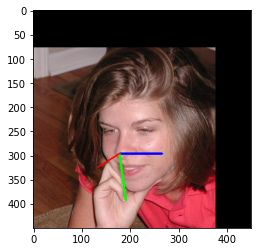

In [12]:
faceModel = mp.solutions.face_mesh
path = '../resources/300W-3D/AFW/134212_1.jpg'
show_image(path)

In [39]:
faceModel = mp.solutions.face_mesh

get_landmarks(path)

landmark {
  x: 0.4275580942630768
  y: 0.7083598971366882
  z: -0.021225085482001305
}
landmark {
  x: 0.40047356486320496
  y: 0.6729069948196411
  z: -0.08002325892448425
}
landmark {
  x: 0.41986843943595886
  y: 0.6791864633560181
  z: -0.03439902141690254
}
landmark {
  x: 0.3920198678970337
  y: 0.6186199188232422
  z: -0.06832714378833771
}
landmark {
  x: 0.3969045877456665
  y: 0.6586124300956726
  z: -0.08911748230457306
}
landmark {
  x: 0.3988141417503357
  y: 0.6365519165992737
  z: -0.08855444937944412
}
landmark {
  x: 0.40991172194480896
  y: 0.5787093639373779
  z: -0.0653669536113739
}
landmark {
  x: 0.33251890540122986
  y: 0.558673620223999
  z: 0.039441708475351334
}
landmark {
  x: 0.41022950410842896
  y: 0.5405953526496887
  z: -0.06641752272844315
}
landmark {
  x: 0.4069265127182007
  y: 0.5218215584754944
  z: -0.07626279443502426
}
landmark {
  x: 0.4048173427581787
  y: 0.4403807520866394
  z: -0.08632626384496689
}
landmark {
  x: 0.4299390912055969
  y: